## Experiment Overview
We want to know how the techical variability compares to the variability between subjects, cell types, and time points. We use correlation coefficients to show this at a very high level.

### Access data
First, we import our data package and create a proteomic dataset object as <code>prot</code>. 

In [1]:
import longitudinalCLL
prot = longitudinalCLL.get_proteomic()
prot.load_dataset(version='July_noMBR_FP', subjects = []) #get both


prot.data_raw.head()

,Subject1_B_cells_062920_C_10,Subject1_B_cells_062920_C_11,Subject1_B_cells_062920_C_12,Subject1_B_cells_062920_C_13,Subject1_B_cells_062920_C_9,Subject1_B_cells_072920_C_4,Subject1_B_cells_072920_C_5,Subject1_B_cells_072920_C_6,Subject1_B_cells_072920_C_8,Subject1_B_cells_072920_C_9,...,Subject2_T_cells_062920_F_12,Subject2_T_cells_062920_F_13,Subject2_T_cells_062920_F_14,Subject2_T_cells_062920_F_9,Subject2_T_cells_072920_F_1,Subject2_T_cells_072920_F_3,Subject2_T_cells_072920_F_4,Subject2_T_cells_072920_F_5,Subject2_T_cells_072920_F_6,Subject2_T_cells_072920_F_8
Protein ID,,,,,,,,,,,,,,,,,,,,,
A0A0B4J2D5,3203277.5,4697996.0,7346776.5,8472867.0,4280919.5,0.0,4787781.50,2153860.2,5444238.5,5514300.50,...,0.0,4905873.00,0.0,3405266.0,4656720.00,1673629.9,6060600.5,2407679.5,7791855.0,5542659.50
A0AVT1,1917388.2,3033529.2,3773018.8,1865758.6,5191332.5,3332031.5,2464089.00,2290868.2,2486001.2,2596365.20,...,1091121.4,630647.25,576871.9,0.0,0.00,0.0,0.0,827356.1,1260652.0,0.00
A0FGR8,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,...,1514363.4,866311.94,0.0,0.0,0.00,0.0,0.0,0.0,653698.6,879074.56
A6NHR9,2650513.5,0.0,3788095.8,0.0,0.0,1845555.5,933499.44,1958162.5,1604476.4,418360.38,...,0.0,0.00,0.0,0.0,430484.97,0.0,0.0,0.0,538303.6,948190.40
A8K2U0,0.0,0.0,0.0,1149867.8,0.0,0.0,0.00,0.0,2272656.2,0.00,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00


In [2]:
import numpy as np
from numpy import nan, log2
from statistics import median

### Filter Data
We select the proteins that are measured in at least three samples from each group, allowing the calculations to proceed without imputed zero-handling.

In [3]:
cell_types = ['Subject1_B_cells_062920', 'Subject1_T_cells_062920',
              'Subject2_B_cells_062920', 'Subject2_T_cells_062920',
              'Subject1_B_cells_072920', 'Subject1_T_cells_072920',
              'Subject2_B_cells_072920', 'Subject2_T_cells_072920',
             ]

indecies = prot.check_n_of_each_type(cell_types=cell_types, null_value=0)
prot.data_frame = prot.data_frame[indecies]

print ("Total groups identified:")
print(prot.data_raw.shape[0])

print ("Proteins identified in at least 3 of each cell type:\t")
print (prot.data_frame.shape[0])

Total groups identified:
2426
Proteins identified in at least 3 of each cell type:	
887


Now we normalize across runs.

In [4]:
prot.normalize()

,Subject1_B_cells_062920_C_10,Subject1_B_cells_062920_C_11,Subject1_B_cells_062920_C_12,Subject1_B_cells_062920_C_13,Subject1_B_cells_062920_C_9,Subject1_B_cells_072920_C_4,Subject1_B_cells_072920_C_5,Subject1_B_cells_072920_C_6,Subject1_B_cells_072920_C_8,Subject1_B_cells_072920_C_9,...,Subject2_T_cells_062920_F_12,Subject2_T_cells_062920_F_13,Subject2_T_cells_062920_F_14,Subject2_T_cells_062920_F_9,Subject2_T_cells_072920_F_1,Subject2_T_cells_072920_F_3,Subject2_T_cells_072920_F_4,Subject2_T_cells_072920_F_5,Subject2_T_cells_072920_F_6,Subject2_T_cells_072920_F_8
Protein ID,,,,,,,,,,,,,,,,,,,,,
O00148,1.376479,1.340402,1.281538,1.110298,0.827271,1.387920,1.070221,1.180213,0.915809,0.973494,...,1.208520,0.820813,1.445078,1.133851,1.295829,1.125747,1.076853,1.063122,1.208865,1.176501
O00151,-0.016176,0.035770,-0.107583,-0.033451,-0.122543,0.642699,0.635634,0.546499,0.179025,0.421700,...,-0.905244,-2.216417,-1.336944,-1.758952,NaN,-1.610953,-1.486349,-1.004640,-2.027082,-1.413533
O00170,-1.794057,-2.402547,-1.803541,NaN,NaN,-1.696609,-1.764992,-2.035327,-1.878247,-1.283572,...,-1.275011,-1.551711,-1.764623,-1.904828,-1.107308,-1.086965,-1.045284,-1.433503,-1.129767,-1.110887
O00231,-1.809268,-2.044939,-2.671723,NaN,-1.681016,NaN,-1.683055,NaN,-1.950543,-1.739249,...,-1.805573,-2.134510,-2.222441,-1.673983,-1.603100,-1.648746,-1.372268,-1.959888,-1.550092,-1.660486
O00303,-1.152235,-2.291264,-1.539569,-2.802766,-1.759188,-1.105277,-1.832747,-0.756486,-1.715554,-1.300011,...,-0.511477,-2.620680,-1.726668,-1.177003,-2.046698,-1.711648,-1.323695,-1.201397,-1.120975,-0.831181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q96Q89,-1.579776,-1.663152,NaN,-1.032686,NaN,6.273895,0.542648,NaN,NaN,0.296398,...,3.482063,-0.630322,5.411662,-0.486205,1.157400,1.918461,0.378184,0.346815,-0.821644,NaN
P60983,0.442218,0.182954,0.132332,-0.115793,0.031849,0.083846,-0.096756,0.405767,-0.403734,-0.629704,...,0.969553,1.096736,0.996800,0.701211,0.329537,0.668325,0.066140,1.033020,-0.087159,0.148615
P62891,-1.872248,-1.729424,-1.822848,-1.287767,-1.553814,NaN,-0.915629,-0.672013,-0.996686,-0.854449,...,-0.721069,NaN,-1.024867,-2.807583,-0.934545,NaN,-0.461915,NaN,-0.524303,NaN


In [5]:
from scipy.stats import variation
from statistics import mean
import pandas as pd
from numpy import isnan
import matplotlib.pyplot as plt
import seaborn as sns

### Correlation coefficient
Next, we show reproducibility of the replicates by Spearman correlation coefficient.

In [6]:
try: 
    prot.data_frame.drop(columns=['Blank_5','Blank_4','Blank_3'], inplace=True)
except: print()

In [7]:
correlations = prot.data_frame.corr(method="spearman")

#drop self-correlations of 1
for sample in correlations.columns:
    correlations[sample][sample]=nan

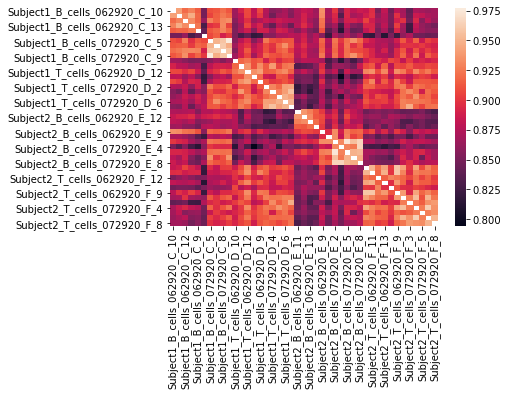

In [8]:
sns.heatmap(correlations)

Now, I could simply plot all possible correlation combinations. This is too busy to be intuitive to read. I can collapse the heatmap by showing each comparison as the average across technical replicates, i.e., Subject 1's B cells from June against Subject 1's B cells from July is on average a correlation of .88

In [9]:
all_cell_types = ["Subject1_B_cells_062920","Subject1_B_cells_072920",
                  "Subject2_B_cells_062920",  "Subject2_B_cells_072920",
                  "Subject1_T_cells_062920","Subject1_T_cells_072920",
                  "Subject2_T_cells_062920", "Subject2_T_cells_072920"]

corr_summary = {}
for i in all_cell_types:
    corr_summary[i] = {}
    for j in all_cell_types:
        subset = list(s for s in correlations.columns if i in s)
        subset2 = list(s for s in correlations.columns if j in s)

        d = correlations[subset].loc[subset2]
        means = d.apply(lambda r: mean(r.dropna()))
        m = mean(means)
        corr_summary[i][j] = m
    
corr_summary = pd.DataFrame(corr_summary)


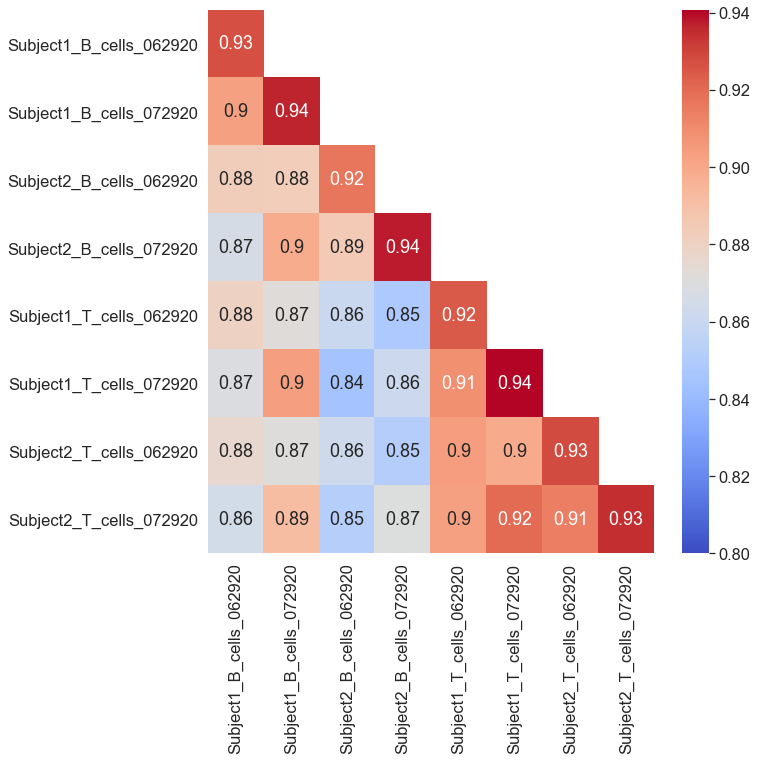

In [10]:
sns.set(font_scale=1.5)
sns.set_style("white")


fig = plt.figure(figsize=(10,10))
mask = np.zeros(corr_summary.shape, dtype=bool)

mask[np.triu_indices(len(mask))] = True

for i in range(0,len(mask)):
    mask[i][i]=False
        
sns.heatmap(corr_summary, cmap = 'coolwarm', mask = mask, annot=True, vmin=0.80)

#plt.savefig("data/correlations.png", dpi=300, bbox_inches='tight')

This heatmap is a little more helpful. Technical reproducibility is very high. T cells are pretty high. Comparing B cells to T cells has the lowest correlations. Our primary interest, however, is in identifying the time dependent change and contextualizing it against B-T differences. This message is not clear from the heatmap, so I instead plot the comparisions of interest as a box plot.

#### Boxplots of correlations
First, I want the technical reproducibility. I'll use B cells and June, the first month's, data. I'll use both subjects, but only compare replicates within a subject to exclude inter-subject variability. 

In [11]:
B_technical = {}
for cell_type in ["Subject1_B_cells_062920",
                  "Subject2_B_cells_062920",
                  "Subject1_B_cells_072920",
                  "Subject2_B_cells_072920",
                  "Subject1_T_cells_062920",
                  "Subject2_T_cells_062920",
                  "Subject1_T_cells_072920",
                  "Subject2_T_cells_072920"]:
    
    blocks_of_type = list(s for s in correlations.keys() if cell_type in s)
    
    corr_by_type = correlations[blocks_of_type]
    corr_by_type = corr_by_type.loc[blocks_of_type]
    
    #remove duplicate corner and self-correlations of 1
    corr_by_type =corr_by_type.mask(np.tril(np.ones(corr_by_type.shape)).astype(np.bool))
        
    B_technical[cell_type] = pd.Series([i for i in corr_by_type.values.flatten() if not isnan(i)])
            
B_technical = pd.DataFrame(B_technical) 

In [12]:
#ADDED
B_technical

,Subject1_B_cells_062920,Subject2_B_cells_062920,Subject1_B_cells_072920,Subject2_B_cells_072920,Subject1_T_cells_062920,Subject2_T_cells_062920,Subject1_T_cells_072920,Subject2_T_cells_072920
0,0.942093,0.938126,0.907704,0.933981,0.918145,0.951433,0.931282,0.926401
1,0.920064,0.928019,0.914690,0.882588,0.924054,0.924455,0.919823,0.955549
2,0.928694,0.914514,0.889412,0.930245,0.909933,0.943561,0.942251,0.910067
3,0.914232,0.901165,0.901199,0.904586,0.914389,0.901739,0.944511,0.951008
4,0.929228,0.932952,0.949965,0.914688,0.937014,0.958940,0.928098,0.924836
5,0.947586,0.912696,0.958008,0.931736,0.910601,0.917264,0.941116,0.925947
6,0.918471,0.909113,0.976978,0.974742,0.934014,0.949145,0.956818,0.915631
7,0.932754,0.921134,0.960982,0.956047,0.934613,0.899397,0.949643,0.936288
8,0.917242,0.906681,0.947572,0.965605,0.942712,0.959365,0.942732,0.939640
9,0.924574,0.901687,0.958506,0.929694,0.920282,0.915938,0.950766,0.926934


In [13]:
total = 0
for col in B_technical:
    total = total + mean(B_technical[col].dropna())
    print ("{0}:\t{1:.5f}".format(col, mean(B_technical[col].dropna())))
total

Subject1_B_cells_062920:	0.92749
Subject2_B_cells_062920:	0.91661
Subject1_B_cells_072920:	0.93650
Subject2_B_cells_072920:	0.93756
Subject1_T_cells_062920:	0.92458
Subject2_T_cells_062920:	0.92830
Subject1_T_cells_072920:	0.94070
Subject2_T_cells_072920:	0.93497


7.446717542481341

In [14]:
ratio = total/B_technical.shape[1]
ratio

0.9308396928101677

In [15]:
T_technical = {}
for cell_type in ["Subject1_T_cells_062920",
                  "Subject2_T_cells_062920",
                  "Subject1_T_cells_072920",
                  "Subject2_T_cells_072920"]:
    
    blocks_of_type = list(s for s in correlations.keys() if cell_type in s)
    
    corr_by_type = correlations[blocks_of_type]
    corr_by_type = corr_by_type.loc[blocks_of_type]
    
    #remove duplicate corner and self-correlations of 1
    corr_by_type =corr_by_type.mask(np.tril(np.ones(corr_by_type.shape)).astype(np.bool))
        
    T_technical[cell_type] = pd.Series([i for i in corr_by_type.values.flatten() if not isnan(i)])
            
T_technical = pd.DataFrame(T_technical) 

Second, I want to show the time dependent change. I'll do the same as getting the technical variability, but rather than June against June, get June against July.

In [16]:
time_change = {}
for cell_type in ["Subject1_B_cells", 
                  "Subject2_B_cells",
                  "Subject1_T_cells", 
                  "Subject2_T_cells"
                 ]:
    
    time_1_type = list(s for s in correlations.keys() if "{0}_062920".format(cell_type) in s)
    time_2_type = list(s for s in correlations.keys() if "{0}_072920".format(cell_type) in s)
    
    corr_by_type = correlations[time_1_type]
    corr_by_type = corr_by_type.loc[time_2_type]
    
    #remove duplicate corner and self-correlations of 1
    corr_by_type =corr_by_type.mask(np.tril(np.ones(corr_by_type.shape)).astype(np.bool))
        
    time_change[cell_type] = pd.Series([i for i in corr_by_type.values.flatten() if not isnan(i)])
           
time_change = pd.DataFrame(time_change) 
print ("Similarity between time points:")
for col in time_change:
    print ("{0}:\t{1:.5f}".format(col, mean(time_change[col].dropna())))

Similarity between time points:
Subject1_B_cells:	0.88724
Subject2_B_cells:	0.89014
Subject1_T_cells:	0.90555
Subject2_T_cells:	0.91345


Next, I want to show inter-subject variability. I'll do the same as getting the time variability, but rather than June against July, get June Subject 1 against June Subject 2.

In [17]:
#correlations.keys()

In [18]:
subject_change = {}
for cell_type in ["B_cells_062920",
                  "B_cells_072920",
                  "T_cells_062920",
                  "T_cells_072920"
                 ]:
    
    time_1_type = list(s for s in correlations.keys() if "Subject1_{0}".format(cell_type) in s)
    time_2_type = list(s for s in correlations.keys() if "Subject2_{0}".format(cell_type) in s)
    
    corr_by_type = correlations[time_1_type]
    corr_by_type = corr_by_type.loc[time_2_type]
    
    #remove duplicate corner and self-correlations of 1
    corr_by_type =corr_by_type.mask(np.tril(np.ones(corr_by_type.shape)).astype(np.bool))
        
    subject_change[cell_type] = pd.Series([i for i in corr_by_type.values.flatten() if not isnan(i)])
           
subject_change = pd.DataFrame(subject_change) 
print ("Similarity between subjects:")
for col in subject_change:
    print ("{0}:\t{1:.5f}".format(col, mean(subject_change[col].dropna())))

Similarity between subjects:
B_cells_062920:	0.87209
B_cells_072920:	0.89785
T_cells_062920:	0.90953
T_cells_072920:	0.92370


Finally, I want to show B versus T differences. This provides context for the time dependent change. I'll just use data from the first month in this figure, but the results are similar for both.

In [19]:
B_T = {}
for time in ["062920","072920"]:
    for cell_type in ["Subject1", "Subject2"]:

        B_type = list(s for s in correlations.keys() if "{0}_B_cells_{1}".format(cell_type, time) in s)
        T_type = list(s for s in correlations.keys() if "{0}_T_cells_{1}".format(cell_type, time) in s)

        corr_by_type = correlations[B_type]
        corr_by_type = corr_by_type.loc[T_type]

        #remove duplicate corner and self-correlations of 1
        corr_by_type =corr_by_type.mask(np.tril(np.ones(corr_by_type.shape)).astype(np.bool))
        
        name = "{0}_{1}".format(cell_type, time)
        B_T[name] = pd.Series([i for i in corr_by_type.values.flatten() if not isnan(i)])

B_T = pd.DataFrame(B_T) 
print ("Similarity between cell types:")
for col in B_T:
    print ("{0}:\t{1:.5f}".format(col, mean(B_T[col].dropna())))

Similarity between cell types:
Subject1_062920:	0.86915
Subject2_062920:	0.86842
Subject1_072920:	0.91083
Subject2_072920:	0.87909


Now, I have variability for each of my comparisons. For each of the three, I want to pick one to show - ie, just Subject 1's June B cells to show technical variability rather than all sets of technical replicates. Here I select these comparisons and save them as a dataframe.

In [20]:
tech_comp = B_technical["Subject1_B_cells_062920"]
time_comp = time_change["Subject1_B_cells"]
sub_comp = subject_change["B_cells_062920"]
BT_comp = B_T["Subject1_062920"]


tech_title = 'Sub1 B cells Day 0'
time_title = 'Sub1 B cells - Day 0 vs 30'
sub_title = 'B cells Day 0 - Sub1 vs Sub 2'
BT_title = "Sub1 Day 0 - B vs T cells"

In [21]:
selected_comparisons = pd.DataFrame({tech_title:tech_comp,
                        time_title:time_comp,
                        sub_title:sub_comp,
                        BT_title:BT_comp,
                       })

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Sub1 B cells Day 0 v.s. Sub1 B cells - Day 0 vs 30: t-test independent samples with Bonferroni correction, P_val=1.408e-02 stat=3.225e+00
Sub1 B cells Day 0 v.s. B cells Day 0 - Sub1 vs Sub 2: t-test independent samples with Bonferroni correction, P_val=8.919e-08 stat=9.240e+00
Sub1 B cells Day 0 v.s. Sub1 Day 0 - B vs T cells: t-test independent samples with Bonferroni correction, P_val=1.267e-07 stat=9.025e+00


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

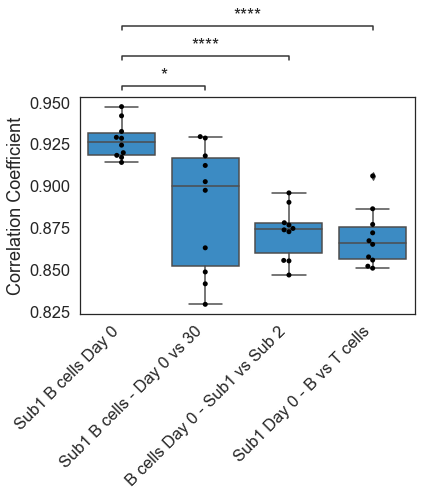

In [22]:

from statannot import add_stat_annotation

fig = plt.figure()
ax = sns.boxplot(data=selected_comparisons, color='#258fda')
ax = sns.swarmplot(data=selected_comparisons, color="black")

add_stat_annotation(ax, data=selected_comparisons,
                    box_pairs=[(tech_title, time_title),
                               (tech_title, sub_title), 
                               (tech_title, BT_title), 
                               ],
                    test='t-test_ind', text_format='star', loc='outside', verbose=2)

ax.set(ylabel="Correlation Coefficient")

plt.xticks(rotation=45, ha='right')
#plt.savefig("data/figure3_selected_correlations.png", dpi=300, bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Sub1 B cells Day 0 v.s. Sub1 B cells - Day 0 vs 30: t-test independent samples with Bonferroni correction, P_val=4.694e-03 stat=3.225e+00


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

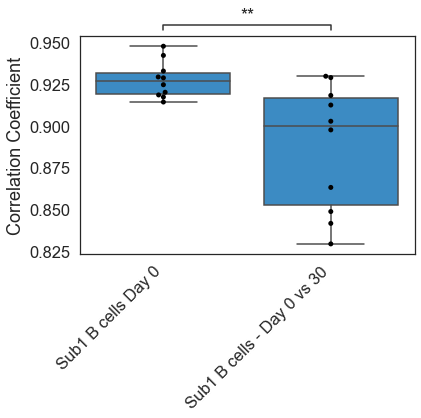

In [23]:
selected_comparisons = pd.DataFrame({tech_title:tech_comp,
                        time_title:time_comp,
                       })
fig = plt.figure()
ax = sns.boxplot(data=selected_comparisons, color='#258fda')
ax = sns.swarmplot(data=selected_comparisons, color="black")

add_stat_annotation(ax, data=selected_comparisons,
                    box_pairs=[(tech_title, time_title),

                               ],
                    test='t-test_ind', text_format='star', loc='outside', verbose=2)

ax.set(ylabel="Correlation Coefficient")

plt.xticks(rotation=45, ha='right')

To confirm that these are statistically significant difference, I use a T test. Note that statistically significant can refer to a small change and merely state that there is a change. This is statistically significant, but further investigation is required to say if the magnitude of change (2%) is biologically meaningful.